# Tokyo 2020 Athletes Analysis

- count the number of athletes for each country
- Rate the countries by athelets per million
- Which countries show the highest full-represenatation for team sports?
- top countries by medals
- Tableau Dashboard

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as math
import datetime as dt
from functools import reduce
from scipy import stats as st
import plotly.express as px
import scipy.stats as stats
import plotly.graph_objects as go
from plotly.graph_objects import Layout

import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

In [31]:
import plotly.io as pio

pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'svg'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery']

In [108]:
pio.renderers.default = "jupyterlab"

In [109]:
# upload files

athletes = pd.read_excel('Athletes.xlsx')
coaches = pd.read_excel('Coaches.xlsx')
entriesGender = pd.read_excel('EntriesGender.xlsx')
medals = pd.read_excel('Medals.xlsx')
teams = pd.read_excel('Teams.xlsx')

df_list = [athletes,coaches,entriesGender,medals,teams]

In [110]:
athletes.name = 'athletes'
coaches.name = 'coaches'
entriesGender.name = 'entriesGender'
medals.name = 'medals'
teams.name = 'teams'

In [111]:
display(athletes.sample(5))
display(entriesGender.sample(5))
display(medals.sample(5))
display(teams.sample(5))

,Name,NOC,Discipline
9197,SORONZONBOLD Battsetseg,Mongolia,Wrestling
7545,PELLEGRINI Federica,Italy,Swimming
8442,SADIKI Abdelatif,Morocco,Athletics
10425,WANG Yuwei,People's Republic of China,Rowing
15,ABDALLAH Shahd,Egypt,Artistic Swimming


,Discipline,Female,Male,Total
7,Basketball,144,144,288
30,Rugby Sevens,146,151,297
15,Cycling Road,70,131,201
2,Artistic Gymnastics,98,98,196
0,3x3 Basketball,32,32,64


,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
58,59,Estonia,1,0,1,2,66
33,34,Chinese Taipei,2,4,6,12,22
4,5,ROC,20,28,23,71,3
49,50,Philippines,1,2,1,4,47
79,77,North Macedonia,0,1,0,1,77


,Name,Discipline,NOC,Event
458,Australia,Hockey,Australia,Men
698,Argentina,Volleyball,Argentina,Women
410,Chile,Football,Chile,Women
178,Netherlands,Athletics,Netherlands,Men's 4 x 100m Relay
343,ROC,Cycling Track,ROC,Women's Madison


In [112]:
# check for missing values
for i in df_list:
    display(i.name)
    display(i.isnull().sum())

'athletes'

Name          0
NOC           0
Discipline    0
dtype: int64

'coaches'

Name            0
NOC             0
Discipline      0
Event         145
dtype: int64

'entriesGender'

Discipline    0
Female        0
Male          0
Total         0
dtype: int64

'medals'

Rank             0
Team/NOC         0
Gold             0
Silver           0
Bronze           0
Total            0
Rank by Total    0
dtype: int64

'teams'

Name          0
Discipline    0
NOC           0
Event         0
dtype: int64

## 1. count the number of athletes for each country

In [114]:
# groupby country, count the number of atheltes
NOC_athletes_cnt = athletes.groupby('NOC')['Name'].count().reset_index().rename(columns = {'Name':'cnt'}).sort_values('cnt', ascending = False)

# plot top 20 countries who have the most athletes
fig = px.bar(NOC_athletes_cnt.head(20), 
             x="NOC", y='cnt', hover_data=['NOC'])


fig.show()

## 2. Rate the countries by athelets per million

#### - Aquire population data.

Link: https://worldpopulationreview.com/

In [95]:
census_data = pd.read_csv('CensusData.csv')

display(census_data.info()) # pop data is numeric 
census_data_copy = census_data.copy()
display(census_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cca2             231 non-null    object 
 1   name             232 non-null    object 
 2   pop2021          232 non-null    float64
 3   pop2020          232 non-null    float64
 4   pop2050          232 non-null    float64
 5   pop2030          232 non-null    float64
 6   pop2019          232 non-null    float64
 7   pop2015          232 non-null    float64
 8   pop2010          232 non-null    float64
 9   pop2000          232 non-null    float64
 10  pop1990          232 non-null    float64
 11  pop1980          232 non-null    float64
 12  pop1970          232 non-null    float64
 13  area             232 non-null    int64  
 14  Density          232 non-null    float64
 15  GrowthRate       232 non-null    float64
 16  WorldPercentage  232 non-null    float64
 17  rank            

None

,cca2,name,pop2021,pop2020,pop2050,pop2030,pop2019,pop2015,pop2010,pop2000,pop1990,pop1980,pop1970,area,Density,GrowthRate,WorldPercentage,rank
0,CN,China,1444216.107,1439323.776,1402405.170,1464340.159,1433783.686,1406847.870,1368810.615,1290550.765,1176883.674,1000089.235,827601.394,9706961,148.7815,1.0034,0.1834,1
1,IN,India,1393409.038,1380004.385,1639176.033,1503642.322,1366417.754,1310152.403,1234281.170,1056575.549,873277.798,698952.844,555189.792,3287590,423.8391,1.0097,0.1769,2
2,US,United States,332915.073,331002.651,379419.102,349641.876,329064.917,320878.310,309011.475,281710.909,252120.309,229476.354,209513.341,9372610,35.5200,1.0058,0.0423,3
3,ID,Indonesia,276361.783,273523.615,330904.664,299198.430,270625.568,258383.256,241834.215,211513.823,181413.402,147447.836,114793.178,1904569,145.1046,1.0104,0.0351,4
4,PK,Pakistan,225199.937,220892.340,338013.196,262958.794,216565.318,199426.964,179424.641,142343.578,107647.921,78054.343,58142.060,881912,255.3542,1.0195,0.0286,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,MS,Montserrat,4.977,4.992,4.153,4.763,4.989,4.967,4.899,4.929,10.615,11.607,11.534,102,48.7941,0.9970,0.0000,228
228,FK,Falkland Islands,3.533,3.480,3.243,3.436,3.377,2.834,2.901,2.892,1.982,1.854,1.992,12173,0.2902,1.0152,0.0000,229
229,NU,Niue,1.619,1.626,1.778,1.664,1.615,1.619,1.618,1.899,2.329,3.404,5.135,260,6.2269,0.9957,0.0000,230
230,TK,Tokelau,1.373,1.357,1.565,1.448,1.340,1.252,1.140,1.554,1.608,1.553,1.621,12,114.4167,1.0118,0.0000,231


- The data is numeric
- population should be corrected - multiply by 1000

#### fix population data 

In [44]:
# array of all columns containing population data
pop_cols = [col for col in census_data.columns if 'pop' in col]

# correct the population columns 
for i in pop_cols:
    census_data[i] = census_data[i] * 1000
    census_data[i] = census_data[i].astype(int)

display(census_data)

,cca2,name,pop2021,pop2020,pop2050,pop2030,pop2019,pop2015,pop2010,pop2000,pop1990,pop1980,pop1970,area,Density,GrowthRate,WorldPercentage,rank
0,CN,China,1444216107,1439323775,1402405170,1464340159,1433783686,1406847870,1368810615,1290550765,1176883674,1000089235,827601394,9706961,148.7815,1.0034,0.1834,1
1,IN,India,1393409038,1380004385,1639176033,1503642322,1366417754,1310152403,1234281170,1056575549,873277798,698952844,555189792,3287590,423.8391,1.0097,0.1769,2
2,US,United States,332915073,331002651,379419102,349641876,329064917,320878310,309011475,281710909,252120308,229476354,209513341,9372610,35.5200,1.0058,0.0423,3
3,ID,Indonesia,276361783,273523615,330904664,299198430,270625568,258383256,241834215,211513823,181413402,147447836,114793178,1904569,145.1046,1.0104,0.0351,4
4,PK,Pakistan,225199937,220892340,338013196,262958794,216565318,199426963,179424641,142343578,107647921,78054343,58142060,881912,255.3542,1.0195,0.0286,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,MS,Montserrat,4977,4992,4153,4763,4989,4967,4899,4928,10615,11607,11534,102,48.7941,0.9970,0.0000,228
228,FK,Falkland Islands,3533,3480,3243,3436,3377,2833,2901,2892,1982,1854,1992,12173,0.2902,1.0152,0.0000,229
229,NU,Niue,1619,1626,1778,1664,1615,1619,1618,1899,2329,3404,5135,260,6.2269,0.9957,0.0000,230
230,TK,Tokelau,1373,1357,1565,1448,1340,1252,1140,1554,1608,1553,1621,12,114.4167,1.0118,0.0000,231


#### slice the data for 2021

In [45]:
# slice the data for 2021
census_2021 = census_data[['name','pop2021']]

#### check for suspect aliases in country name columns of both census and athelets dataframes

In [46]:
# Korea 
display(census_2021[census_2021['name'].str.contains("Korea")])
display(NOC_athletes_cnt[NOC_athletes_cnt['NOC'].str.contains("Korea")])
# United 
display(census_2021[census_2021['name'].str.contains("United")])
display(NOC_athletes_cnt[NOC_athletes_cnt['NOC'].str.contains("United")])
# America
display(census_2021[census_2021['name'].str.contains("America")])
display(NOC_athletes_cnt[NOC_athletes_cnt['NOC'].str.contains("America")])
# Russia
display(census_2021[census_2021['name'].str.contains("Russ")])
display(NOC_athletes_cnt[NOC_athletes_cnt['NOC'].str.contains("Russ")])
# Congo
display(census_2021[census_2021['name'].str.contains("Cong")])
display(NOC_athletes_cnt[NOC_athletes_cnt['NOC'].str.contains("Cong")])

,name,pop2021
27,South Korea,51305186
53,North Korea,25887041


,NOC,cnt
153,Republic of Korea,223


,name,pop2021
2,United States,332915073
20,United Kingdom,68207116
92,United Arab Emirates,9991089
197,United States Virgin Islands,104226


,NOC,cnt
195,United States of America,615
193,United Arab Emirates,4
194,United Republic of Tanzania,2


,name,pop2021
208,American Samoa,55100


,NOC,cnt
195,United States of America,615
3,American Samoa,5


,name,pop2021
8,Russia,145912025


,NOC,cnt


,name,pop2021
15,DR Congo,92377993
115,Republic of the Congo,5657013


,NOC,cnt
51,Democratic Republic of the Congo,7
42,Congo,3


#### Results:

- The manual check showed defrences in aliases:
        census data             | tokyo2020 data                      | checked manually
              
        - South Korea           | Republic of Korea	               |
        - United States         | United States of America            |
        - United Kingdom        | -                                   | Great Britain
        - Russia                | -                                   | ROC
        - DR Congo              | Democratic Republic of the Congo    |
        - Republic of the Congo | Congo	                           |

### Standardize the alias

#### list of similar aliases

In [47]:
# United States
usa_alias = ['United States', 'United States of America', 'US', 'U.S', 'USA', 'U.S.A'] 
# Russia
russia_alias = ['Russia', 'ROC','Russian Federation'] 
# China
china_alias = ['People\'s Republic of China', 'China'] 
# Great Britain
uk_alias = ['Great Britain', 'United Kingdom', 'UK'] 
# South Korea
south_korea_alias = ['Republic of Korea', 'South Korea']


In [48]:
# another good solution example to check suspected aliases:
# census_2021.name.str.contains(usa_pattern)

#### optional exaple: manualy replace data for each country in the census data

In [49]:
#census_2021['name'] = np.where(census_2021['name'].isin(usa_alias), 'United States', census_2021['name'])
#census_2021['name'] = np.where(census_2021['name'].isin(uk_alias), 'Great Britain', census_2021['name'])

#### function: rename the values of the countries column 

In [50]:
# function that change the alias name 
def country_name(df,column):
    df[column] = np.where(df[column].isin(usa_alias), 'United States', df[column])
    df[column] = np.where(df[column].isin(uk_alias), 'Great Britain', df[column])
    df[column] = np.where(df[column].isin(russia_alias), 'Russia', df[column])
    df[column] = np.where(df[column].isin(china_alias), 'China', df[column])
    df[column] = np.where(df[column].isin(south_korea_alias), 'South Korea', df[column])

#### a loop to run on both dfs 

In [51]:
dfs = [census_2021, NOC_athletes_cnt]
column_names = ['name','NOC']

for i in dfs:
    for x in i.columns:
        for j in column_names:
            if j == x:
                country_name(i,j) 
 

In [52]:
# check succseful standardization
display(census_2021.head(5))
display(NOC_athletes_cnt.head(5))

,name,pop2021
0,China,1444216107
1,India,1393409038
2,United States,332915073
3,Indonesia,276361783
4,Pakistan,225199937


,NOC,cnt
195,United States,615
94,Japan,586
10,Australia,470
144,China,401
71,Germany,400


In [53]:
# fill missing values in order to avoide errors
NOC_athletes_cnt = NOC_athletes_cnt.fillna(0)
census_2021 = census_2021.fillna(0)

In [54]:
# Merge the two dataframes and select only the top 50 populated countries
athletes_per_mil = pd.merge(NOC_athletes_cnt.iloc[0:50], census_2021, left_on=  ['NOC'], right_on= ['name'], how = 'left').drop(columns= ['name']).sort_values('pop2021', ascending = False)

In [55]:
# drop missing values
athletes_per_mil = athletes_per_mil.dropna()

In [56]:
# change type in order to show numbers in long form
athletes_per_mil['pop2021'] = athletes_per_mil['pop2021'].astype('int')

In [57]:
# sort the data by number of athletes
athletes_per_mil = athletes_per_mil.sort_values('cnt', ascending = False)
athletes_per_mil.head(5)

,NOC,cnt,pop2021
0,United States,615,332915073
1,Japan,586,126050804
2,Australia,470,25788215
3,China,401,1444216107
4,Germany,400,83900473


In [58]:
# check country
athletes_per_mil[athletes_per_mil['NOC'] == 'Israel']

,NOC,cnt,pop2021
35,Israel,85,8789774


In [59]:
# calculate the number of people per athelete and number of athelers per million
athletes_per_mil['ppl_per_athlete'] = round(athletes_per_mil['pop2021'] / athletes_per_mil['cnt']).astype('int')
athletes_per_mil['athlete_per_mil'] = (athletes_per_mil['cnt'] * 1000000) / athletes_per_mil['pop2021']

In [60]:
# sort the table by athelet per million
athletes_per_mil = athletes_per_mil.sort_values('athlete_per_mil', ascending = False)

athletes_per_mil.head(20)

,NOC,cnt,pop2021,ppl_per_athlete,athlete_per_mil
14,New Zealand,202,4860643,24063,41.558288
26,Ireland,116,4982907,42956,23.279584
46,Jamaica,60,2973463,49558,20.178492
2,Australia,470,25788215,54869,18.225379
29,Denmark,103,5813298,56440,17.717998
32,Norway,92,5465630,59409,16.832460
18,Hungary,155,9634164,62156,16.088578
12,Netherlands,274,17173099,62676,15.955187
48,Croatia,57,4081651,71608,13.964937
27,Switzerland,115,8715494,75787,13.194892


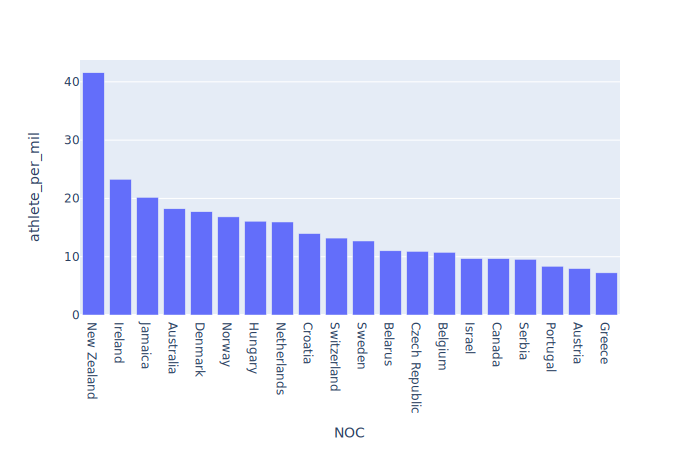

In [61]:
# plot top 30 countries by athelete per 1 million population
fig = px.bar(athletes_per_mil.head(20), x="NOC", y='athlete_per_mil', hover_data=['NOC'])
fig.show()

#### conclusion
- 
- 


## 3. Which countries show the highest full-represenatation for team sports?

In [62]:
# number of total team categories
teams['Discipline'].nunique()

20

In [63]:
display(teams.sample(5))
print('Number of distinct Disciplines:', teams['Discipline'].nunique())

,Name,Discipline,NOC,Event
107,Greece,Artistic Swimming,Greece,Team
485,China,Rhythmic Gymnastics,People's Republic of China,Group All-Around
383,Japan,Fencing,Japan,Women's Sabre Team
298,Canada,Cycling Track,Canada,Women's Madison
629,United States,Swimming,United States of America,Women's 4 x 100m Medley Relay


Number of distinct Disciplines: 20


In [64]:
display(teams.head(10))

,Name,Discipline,NOC,Event
0,Belgium,3x3 Basketball,Belgium,Men
1,China,3x3 Basketball,People's Republic of China,Men
2,China,3x3 Basketball,People's Republic of China,Women
3,France,3x3 Basketball,France,Women
4,Italy,3x3 Basketball,Italy,Women
5,Japan,3x3 Basketball,Japan,Men
6,Japan,3x3 Basketball,Japan,Women
7,Latvia,3x3 Basketball,Latvia,Men
8,Mongolia,3x3 Basketball,Mongolia,Women
9,Netherlands,3x3 Basketball,Netherlands,Men


In [65]:
# find the number of distinct events for each discipline
discipline_max_events = teams.groupby('Discipline')['Event'].nunique().reset_index().rename(columns = {'Event':'max_events'}).sort_values('max_events', ascending = False)
discipline_max_events.head(10)

,Discipline,max_events
15,Swimming,7
8,Cycling Track,6
9,Fencing,6
4,Athletics,5
16,Table Tennis,3
1,Archery,3
0,3x3 Basketball,2
11,Handball,2
18,Volleyball,2
14,Rugby Sevens,2


In [66]:
# count the number of teams for each country by discipline
dicipline_NOC = teams.groupby(['Discipline', 'NOC'])['Event'].count().reset_index().rename(columns={'Event':'No_of_Represtative'})
display(dicipline_NOC)

# join the maximum number of possible teams for eeach dicipline 
dicipline_NOC = dicipline_NOC.merge(discipline_max_events[['Discipline','max_events']] , on = 'Discipline', how = 'left').sort_values(['max_events', 'No_of_Represtative'], ascending = False)

display(dicipline_NOC.head(20))

,Discipline,NOC,No_of_Represtative
0,3x3 Basketball,Belgium,1
1,3x3 Basketball,France,1
2,3x3 Basketball,Italy,1
3,3x3 Basketball,Japan,2
4,3x3 Basketball,Latvia,1
...,...,...,...
395,Water Polo,ROC,1
396,Water Polo,Serbia,1
397,Water Polo,South Africa,2
398,Water Polo,Spain,2


,Discipline,NOC,No_of_Represtative,max_events
293,Swimming,Australia,7,7
300,Swimming,Germany,7,7
308,Swimming,Japan,7,7
314,Swimming,ROC,7,7
322,Swimming,United States of America,7,7
295,Swimming,Brazil,6,7
296,Swimming,Canada,6,7
301,Swimming,Great Britain,6,7
307,Swimming,Italy,6,7
312,Swimming,People's Republic of China,6,7


In [67]:
# For each record - check if the country sent the maximum amount of teams. 
dicipline_NOC['Full_representation'] = np.where((dicipline_NOC['No_of_Represtative'] / dicipline_NOC['max_events']) == 1, 1, 0)

# new table only for yes/no full represnetations 
dicipline_NOC_full_rep = dicipline_NOC.drop(['No_of_Represtative','max_events'], axis = 'columns')
dicipline_NOC_full_rep.sample(10)

,Discipline,NOC,Full_representation
58,Artistic Gymnastics,Switzerland,0
119,Baseball/Softball,Israel,0
100,Athletics,India,0
341,Table Tennis,Romania,0
352,Triathlon,France,1
323,Table Tennis,Australia,1
278,Rugby Sevens,Australia,1
90,Athletics,Colombia,0
36,Archery,Republic of Korea,1
154,Beach Volleyball,Latvia,1


In [68]:
percentages = dicipline_NOC_full_rep.groupby('NOC')['Full_representation'].count().reset_index().sort_values('Full_representation', ascending = False)
display(percentages.head(10))
display(percentages.tail(10))

,NOC,Full_representation
42,Japan,20
79,United States of America,18
57,People's Republic of China,17
13,Canada,17
2,Australia,15
40,Italy,15
27,France,15
62,ROC,14
72,Spain,13
28,Germany,13


,NOC,Full_representation
25,Estonia,1
26,Fiji,1
29,Ghana,1
32,Honduras,1
36,Indonesia,1
41,Jamaica,1
46,Liechtenstein,1
48,Malaysia,1
52,Morocco,1
83,Zambia,1


In [69]:
# check the prectentage of full representation for each country
percentages['Full_representation'] = (percentages['Full_representation'] / dicipline_NOC_full_rep['Discipline'].nunique())

# sort values 
precentages = percentages.sort_values('Full_representation', ascending = False)

display(precentages.head(10))
display(precentages.tail(10))
# problem to solve - not all countries send represenative at all! Intresting.

,NOC,Full_representation
42,Japan,1.00
79,United States of America,0.90
57,People's Republic of China,0.85
13,Canada,0.85
2,Australia,0.75
40,Italy,0.75
27,France,0.75
62,ROC,0.70
53,Netherlands,0.65
28,Germany,0.65


,NOC,Full_representation
61,Qatar,0.05
0,Angola,0.05
64,Republic of Moldova,0.05
75,Trinidad and Tobago,0.05
82,Vietnam,0.05
80,Uzbekistan,0.05
69,Slovakia,0.05
68,Singapore,0.05
66,Saudi Arabia,0.05
83,Zambia,0.05


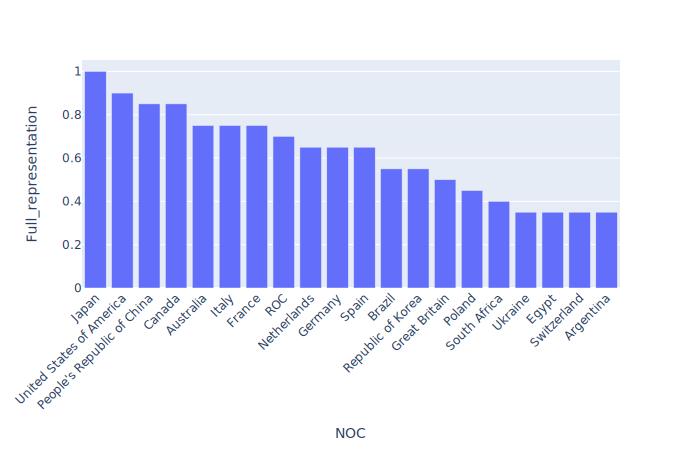

In [70]:
# create graph of top 20 countries with relative full representative
fig = px.bar(percentages.sort_values('Full_representation',ascending = False).iloc[0:20], 
             x="NOC", y='Full_representation', hover_data=['Full_representation'])

# tickangle xaxis
fig.update_layout(xaxis_tickangle=-45)


fig.show()


## 4. top 10 countries by medals

In [71]:
medals

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3
...,...,...,...,...,...,...,...
88,86,Ghana,0,0,1,1,77
89,86,Grenada,0,0,1,1,77
90,86,Kuwait,0,0,1,1,77
91,86,Republic of Moldova,0,0,1,1,77


In [72]:
# standerdize aliases  
country_name(medals, 'Team/NOC')

In [73]:
# add census data
medals = pd.merge(medals, census_2021, left_on = ['Team/NOC'], right_on = ['name'], how = 'left').drop(columns = ['name'])
medals = medals.dropna()
medals['pop2021'] = medals['pop2021'].astype('int')

In [74]:
top_10_total = medals.sort_values('Rank by Total').head(10)
top_10_total

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total,pop2021
0,1,United States,39,41,33,113,1,332915073
1,2,China,38,32,18,88,2,1444216107
4,5,Russia,20,28,23,71,3,145912025
3,4,Great Britain,22,21,22,65,4,68207116
2,3,Japan,27,14,17,58,5,126050804
5,6,Australia,17,7,22,46,6,25788215
9,10,Italy,10,10,20,40,7,60367477
8,9,Germany,10,11,16,37,8,83900473
6,7,Netherlands,10,12,14,36,9,17173099
7,8,France,10,12,11,33,10,65426179


In [75]:
# row function: check if a country is a golden/silver/bronze country by the maximum number of medals
medals

def medal_county(df):
    gold = df.Gold
    silver = df.Silver
    bronze = df.Bronze
    
    if gold > silver and gold > bronze:
        return 'gold'
    elif silver > gold and silver > bronze:
        return 'silver'
    elif bronze > gold and bronze > silver:
        return 'bronze'
    else:
        return 'tie'
        

In [76]:
medals['top_rank'] = medals.apply(medal_county,axis = 1)
medals

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total,pop2021,top_rank
0,1,United States,39,41,33,113,1,332915073,silver
1,2,China,38,32,18,88,2,1444216107,gold
2,3,Japan,27,14,17,58,5,126050804,gold
3,4,Great Britain,22,21,22,65,4,68207116,tie
4,5,Russia,20,28,23,71,3,145912025,silver
...,...,...,...,...,...,...,...,...,...
85,86,Botswana,0,0,1,1,77,2397241,bronze
86,86,Burkina Faso,0,0,1,1,77,21497096,bronze
88,86,Ghana,0,0,1,1,77,31732129,bronze
89,86,Grenada,0,0,1,1,77,113021,bronze


### Medals Pie Charts

Color Palette Hex: https://www.color-hex.com/color-palettes/?keyword=Bronze

#### Gold Medals

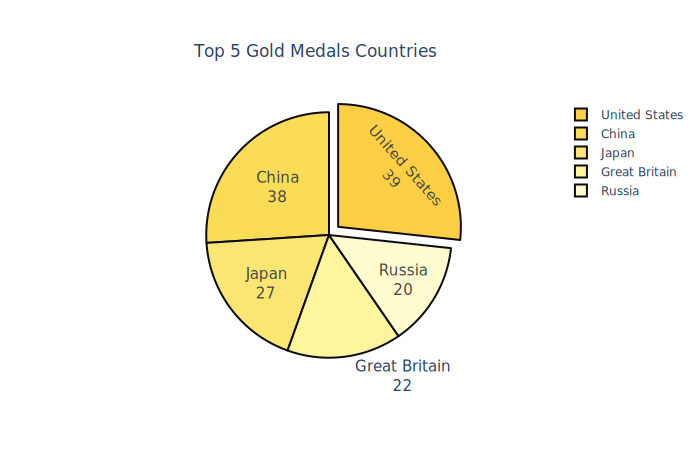

In [77]:
# plot simple pie chart 
#fig = px.pie(medals.sort_values('Gold', ascending = False).head(5), values = 'Gold', names = 'Team/NOC', title = 'Top 10 gold', color_discrete_sequence = px.colors.sequential.thermal)
#fig.show()

gold_palette = ['#fccf45',  '#fadc57', '#fbe673', '#fff59d','#fffdcf']

# plot styled pie chart
fig = go.Figure(data = [go.Pie(labels = medals.sort_values('Gold', ascending = False).head(5)['Team/NOC'], values = medals.sort_values('Gold', ascending = False).head(5)['Gold'])])


fig.update_traces(hoverinfo='label+percent+value', textfont_size=15, textinfo='label+value', 
                  pull=[0.1,0,0,0,0,0],
                  marker=dict(colors = gold_palette ,line=dict(color='#0b0c10', width = 2)))
# add title
fig.update_layout(
    title={
        'text': "Top 5 Gold Medals Countries",
        'y':0.9,
        'x':0.45,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

#### Silver Medals

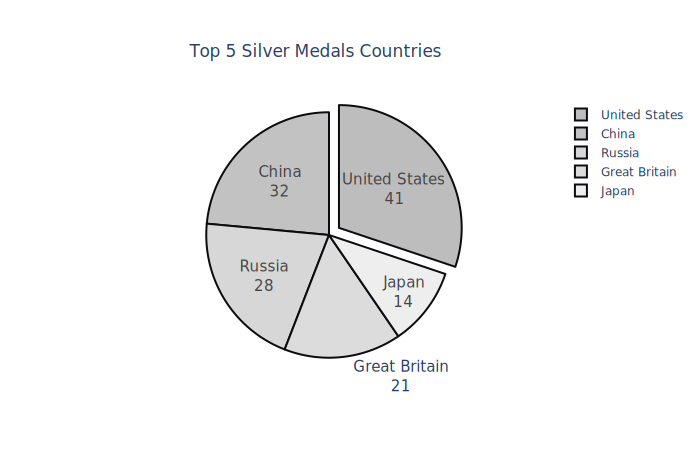

In [78]:

silver_palette = ['#bdbdbd', '#c2c2c2', '#d7d7d7', '#dcdcdc','#eeeeee']

# plot styled pie chart
fig = go.Figure(data = [go.Pie(labels = medals.sort_values('Silver', ascending = False).head(5)['Team/NOC'], values = medals.sort_values('Silver', ascending = False).head(5)['Silver'])])


fig.update_traces(hoverinfo='label+percent+value', textfont_size=15, textinfo='label+value', 
                  pull=[0.1,0,0,0,0,0],
                  marker=dict(colors = silver_palette ,line=dict(color='#0b0c10', width = 2)))
# add title
fig.update_layout(
    title={
        'text': "Top 5 Silver Medals Countries",
        'y':0.9,
        'x':0.45,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

#### Bronze Medals

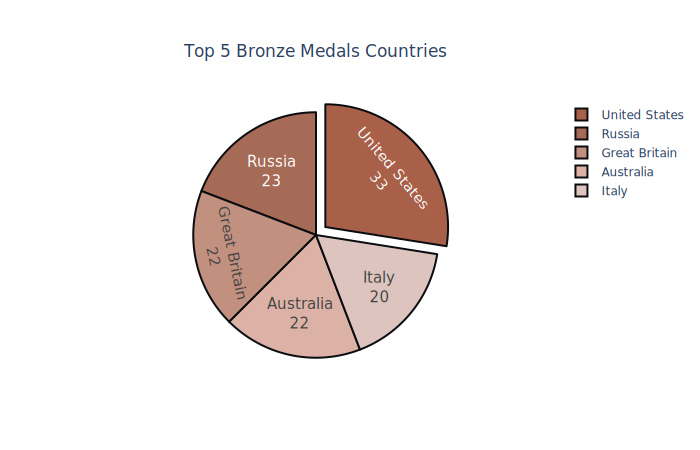

In [79]:

silver_palette = ['#a86048', '#a56b57', '#c1907f', '#ddb2a6','#ddc4be']

# plot styled pie chart
fig = go.Figure(data = [go.Pie(labels = medals.sort_values('Bronze', ascending = False).head(5)['Team/NOC'], values = medals.sort_values('Bronze', ascending = False).head(5)['Bronze'])])


fig.update_traces(hoverinfo='label+percent+value', textfont_size=15, textinfo='label+value', 
                  pull=[0.1,0,0,0,0,0],
                  marker=dict(colors = silver_palette ,line=dict(color='#0b0c10', width = 2)))
# add title
fig.update_layout(
    title={
        'text': "Top 5 Bronze Medals Countries",
        'y':0.9,
        'x':0.45,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

In [80]:
top_10_gold = medals.sort_values('Gold', ascending = False).head(10)
top_10_gold

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total,pop2021,top_rank
0,1,United States,39,41,33,113,1,332915073,silver
1,2,China,38,32,18,88,2,1444216107,gold
2,3,Japan,27,14,17,58,5,126050804,gold
3,4,Great Britain,22,21,22,65,4,68207116,tie
4,5,Russia,20,28,23,71,3,145912025,silver
5,6,Australia,17,7,22,46,6,25788215,bronze
6,7,Netherlands,10,12,14,36,9,17173099,bronze
7,8,France,10,12,11,33,10,65426179,silver
8,9,Germany,10,11,16,37,8,83900473,bronze
9,10,Italy,10,10,20,40,7,60367477,bronze


## Tableau Dashboard

https://public.tableau.com/app/profile/nadav.navon/viz/Tokyo_2020_Analysis/Tokyo_Dashboard?publish=yes